## 형태소 분석

<br>

- 모든 텍스트는 문장으로 이뤄져 있고, 문장은 단어들로 이뤄져 있음.
- **텍스트에서 이런 단어들을 분리하는 작업을 형태소 분석**이라 한다.
- 주의할점은, 형태소 분석 라이브러리는 기능이 다르고 완벽하지가 않으니 많은 테스트를 시행하는 것이 필요.

<br>

    '나는' '국민' '대학교' '축제' 에 놀러 '가고 싶습니다.'
    
- 이처럼 추출한 단어를 bag of words라고 함.
- 하지만 무턱대고 띄어쓰기를 기준으로 구분하면 큰일남. 의미없는 단어들까지 나뉘어짐.
- 단어를 품사별로 구분하기 위해 라이브러리를 사용. 이런 라이브러리를 형태소 분석기 라고 함.
    - KonLPy, 꼬꼬마, Twitter, Komoran. 영어는 NLTK를 많이 씀.
        - 한글 형태소 분석기는 완벽하지 않음. 패키지마다 품사를 나누는 방법 또한 다름.
    - 텍스트 마이닝 목적에 따라 주관적으로 선택해서 쓰는 것이...
- 보통 세종태그세트 라는 것을 표준으로 해서 품사를 나눔.
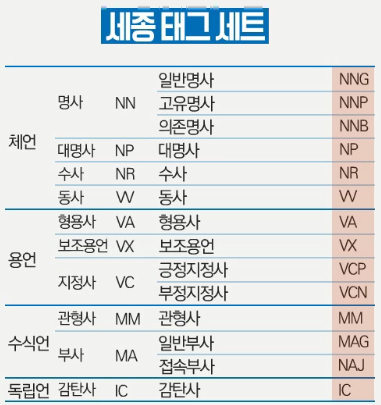

<br>

- 한글 형태소 분석기를 사용하기 위해선
    - JPype 먼저 설치하고 KoNLPy설치. https://konlpy.org/ko/latest/install/#id2


## TF-IDF

<br>

- 변수로서 역할을 하지 못하는 단어들을 제거하는 전처리 작업이 필요.
    - Stop words라는 단어묶음을 만들고, 그 안에 불필요한 단어를 집어넣어 전처리.
- TF? 단어의 중요도를 측정하는 방법. 
    - 특정 문서에서 나오는 모든 단어의 빈도수에서 특정 단어의 빈도수가 차지하는 비율.
    
    $$TF_{i,j} = \frac{F_{i,j}}{\sum_{k} F_{k,j}} = \frac{문서 \, j에서 \, 단어 \, i가 \, 나타나는 \, 빈도수}{문서 \, j에서 \, 모든 \, 단어의 \, 빈도수}$$
    
    - 이런식으로 계산됨.
    
<br>
    
- 빈도수는 문서에 비례해 증가하는 경향이 있어 좋은 척도라고 보기엔 좀 힘듦.
- 특별한 문서에 자주 등장하는 단어가 중요한 단어이다. 이를 수치화 한게 IDF(역문헌 빈도).
    - 전체 문서에서 **특정 단어가 포함된 문서가 차지하는 비율의 역수**로 표현.
        - 역수를 취하면 공통단어에서 멀어진다는 의미.
        
   $$IDF_i = \log \frac{|D|}{\{D_j : 단어_i \in D_j\}} = \log \frac{전체 \, 문서의 \, 수}{해당단어 \, i가 \, 포함된 \, 문서의 \, 수}$$
   
    - 이런식으로 계산됨.
    - **특별한 문서에 나타난 단어일수록 점수가 높게 나옴**.
    
<br>

- TF와 IDF는 중요한 단어가 가지는 특징을 보완적으로 설명해주고 있음.

$$ TF_{i,j} * IDF_i = TFIDF_{i,j}$$

- 이 둘을 곱해서 중요단어를 찾는 척도를 만들어 낼 수 있음.
    - **특정 문서 내에서 빈도수가 높을수록 값은 높아지고**,
    - **전체 문서에서 빈도수가 낮을수록 값은 높아짐**.
- 텍스트 마이닝에서 자주 쓰이는 단어 중요 척도.

**형태소 분석**

In [1]:
import codecs
from konlpy.tag import Twitter

twitter = Twitter()
line = '난 항공대학교의 축제에 놀러 가고 싶습니다.'
malist = twitter.pos(line)
malist

C:\Users\skdbs\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('난', 'Noun'),
 ('항공', 'Noun'),
 ('대학교', 'Noun'),
 ('의', 'Josa'),
 ('축제', 'Noun'),
 ('에', 'Josa'),
 ('놀러', 'Verb'),
 ('가고', 'Verb'),
 ('싶습니다', 'Verb'),
 ('.', 'Punctuation')]

    진짜 ㅆㅂ
    JPype 1.3말고 1.2로 하니 잘된다...개같은

In [3]:
from konlpy.tag import Komoran
tagger = Komoran()

line = '난 항공대학교의 축제에 놀러 가고 싶습니다.'
malist = tagger.pos(line)
malist

[('나', 'VV'),
 ('ㄴ', 'ETM'),
 ('항공대', 'NNP'),
 ('학교', 'NNP'),
 ('의', 'JKG'),
 ('축제', 'NNG'),
 ('에', 'JKB'),
 ('놀', 'VV'),
 ('러', 'EC'),
 ('가', 'VV'),
 ('고', 'EC'),
 ('싶', 'VX'),
 ('습니다', 'EF'),
 ('.', 'SF')]

In [9]:
data = open('UseData/경주여행지식인.txt').read()
data = data.split('\n')
data, len(data)

(['제목: 경주 여행 문의드립니다~!5',
  '날짜: 질문마감률70.5%',
  '질문내용: 안녕하세요.겨울에 아이들과 경주여행을 준비하고 있습니다.2박 혹은3박 정도로 계획중인데,유적지 외에 또 가볼만한 곳이 있을까요?아울러 아이들이 물놀이를 좋아하는데,혹,경주에 있는 호텔이나 리조트 중아이들이 놀수 있는 실내 워터파크가 있는 곳은 어디인지요?다녀오신 분들의 추천 부탁드립니다',
  "답변: 안녕하세요.?여행을 좋아하는?블로거, 쭈니아빠입니다. ^^경주여행 질문을 보면 즐거운 추억이 됐으면 하는 바람으로 제 경험을 공유합니다. 참고해주세요.답변 1. 유적지 외에 가볼만한 곳-----> 겨울철이라면 날씨를 보면서 실내와 실외를 균형있게 코스를 설정하면 좋을 것 같은데요. 제가 다녀온 경주 여행코스를 권역별로 정리를 했습니다. 참고해주세요.답변 2.?실내 워터파크가 있는 곳-----> 경주 보문관광 단지 내 호텔과 리조트에 수영장과 워터파트 있는 곳은 블루원 리조트(대규모 실내워터파크) 경주월드(실외 아쿠아시설) 경주대명리조트(소규모 실내워터파크) 경주?한화리조트(실내 소규모 워터파크) 힐튼 경주(실내 수영장) 경주 드림센터(실내 수영장) 등입니다.그럼,?제가 다녀본 경주여행지를 주요 권역별로 정리를 했습니다. 만약 경주를 여행지로 결정했다면 참고하세요. 그럼 즐거운 여행되세요.?:D[중앙]경주 시내권 주요볼거리 (반나절 소요)경주교촌한옥마을(월정교, 경주향교, 내물왕릉 등)(가족여행 추천)대릉원(천마총)(가족여행 추천)첨성대, 경주계림,(가족여행 추천)안압지(동궁과 월지)반월성, 경주 월성, 국립경주박물관(성덕여왕신종)분황사(분황사모전석탑)(가족여행 추천)김유신장군묘, 무열왕릉오릉(가족여행 추천)[중앙]경주 시내권 주요 숙박장소경주터미널 주변에는?게스트하우스, 모델들이 많습니다. 주로 배낭여행객들에게 적당한 숙소라고 생각합니다.[중앙]경주 시내권 맛집 정보밀면 맛집 / 분식 맛집 / 아구찜 맛집 / 복어 맛집 / 황남빵 맛집 / 경주빵 맛집찰보리빵 맛집 등

In [12]:
from konlpy.tag import Okt

tagger = Okt()
results = []
lines = data
words_all = []

for line in lines:
    # 형태소 분석
    malist = tagger.pos(line, norm=True, stem=True)
    print(malist)
    
    r = []
    for word in malist:
        # 명사/동사/형용사 만 골라내기.
        # word[0] : 단어, word[1] : 품사
        if word[1] in ['Noun', 'Verb', 'Adjective']:
            r.append(word[0])
            words_all.append(word[0])
    r1 = (' '.join(r)).strip()
    results.append(r1)

[('제목', 'Noun'), (':', 'Punctuation'), ('경주', 'Noun'), ('여행', 'Noun'), ('문의', 'Noun'), ('드리다', 'Verb'), ('~!', 'Punctuation'), ('5', 'Number')]
[('날짜', 'Noun'), (':', 'Punctuation'), ('질문', 'Noun'), ('마감', 'Noun'), ('률', 'Noun'), ('70.5%', 'Number')]
[('질문', 'Noun'), ('내용', 'Noun'), (':', 'Punctuation'), ('안녕하다', 'Adjective'), ('.', 'Punctuation'), ('겨울', 'Noun'), ('에', 'Josa'), ('아이', 'Noun'), ('들', 'Suffix'), ('과', 'Josa'), ('경', 'Modifier'), ('주', 'Modifier'), ('여행', 'Noun'), ('을', 'Josa'), ('준비', 'Noun'), ('하고', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation'), ('2', 'Number'), ('박', 'Noun'), ('혹은', 'Adverb'), ('3', 'Number'), ('박', 'Noun'), ('정도', 'Noun'), ('로', 'Josa'), ('계획', 'Noun'), ('중', 'Suffix'), ('인데', 'Josa'), (',', 'Punctuation'), ('유적지', 'Noun'), ('외', 'Noun'), ('에', 'Josa'), ('또', 'Noun'), ('가보다', 'Verb'), ('한', 'Determiner'), ('곳', 'Noun'), ('이', 'Josa'), ('있다', 'Adjective'), ('?', 'Punctuation'), ('아우르다', 'Verb'), ('아이', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('물

[('답변', 'Noun'), (':', 'Punctuation'), ('안녕하다', 'Adjective'), ('.', 'Punctuation'), ('여행', 'Noun'), ('을', 'Josa'), ('좋아하다', 'Adjective'), ('?', 'Punctuation'), ('블로거', 'Noun'), (',', 'Punctuation'), ('쭈니', 'Noun'), ('아빠', 'Noun'), ('이다', 'Adjective'), ('.', 'Punctuation'), ('^^', 'Punctuation'), ('경주', 'Noun'), ('여행', 'Noun'), ('질문', 'Noun'), ('이', 'Josa'), ('올라오다', 'Verb'), ('반갑다', 'Adjective'), ('.?', 'Punctuation'), ('많다', 'Adjective'), ('분', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('통해', 'Noun'), ('서', 'Josa'), ('즐겁다', 'Adjective'), ('추억', 'Noun'), ('을', 'Josa'), ('만들다', 'Verb'), ('좋다', 'Adjective'), ('.', 'Punctuation'), ('그렇다', 'Adjective'), ('바람', 'Noun'), ('으로', 'Josa'), ('제', 'Noun'), ('경험', 'Noun'), ('을', 'Josa'), ('공유', 'Noun'), ('하다', 'Verb'), ('.', 'Punctuation'), ('참고', 'Noun'), ('해주다', 'Verb'), ('.', 'Punctuation'), ('답변', 'Noun'), ('1', 'Number'), ('.?', 'Punctuation'), ('경주', 'Noun'), ('당일치기', 'Noun'), ('코스', 'Noun'), ('----->', 'Punctua

In [13]:
print(words_all)
print(len(words_all))

['제목', '경주', '여행', '문의', '드리다', '날짜', '질문', '마감', '률', '질문', '내용', '안녕하다', '겨울', '아이', '여행', '준비', '있다', '박', '박', '정도', '계획', '유적지', '외', '또', '가보다', '곳', '있다', '아우르다', '아이', '물놀이', '좋아하다', '혹', '경주', '있다', '호텔', '리조트', '중아', '들이다', '놀수', '있다', '실내', '워터파크', '있다', '곳', '어디', '인지', '다녀오다', '분', '추천', '부탁드리다', '답변', '안녕하다', '여행', '좋아하다', '블로거', '쭈니', '아빠', '이다', '경주', '여행', '질문', '보다', '즐겁다', '추억', '돼다', '하다', '바람', '제', '경험', '공유', '하다', '참고', '해주다', '답변', '유적지', '외', '가보다', '곳', '겨울철', '라면', '날씨', '보다', '실내', '실외', '균형', '있다', '코스', '설정', '하다', '좋다', '것', '같다', '제', '다녀오다', '경주', '여행', '코스', '권역', '별로', '정리', '하다', '참고', '해주다', '답변', '실내', '워터파크', '있다', '곳', '경주', '보문', '관광', '단지', '내', '호텔', '리조트', '수영장', '워터', '파트', '있다', '곳', '블루원', '리조트', '대규모', '실내', '워터파크', '경주월드', '실외', '아쿠아', '시설', '경주대', '리조트', '소규모', '실내', '워터파크', '경주', '한화', '리조트', '실내', '소규모', '워터파크', '힐튼', '경주', '실내', '수영장', '경주', '드림', '센터', '실내', '수영장', '등', '이다', '그렇다', '제', '다니다', '보다', '여행지', '주요', '권역', '별로', '정리', 

    형태소만 분석해보는 거니까... 일단은 여기까지.

**신문컬럼 봐보기**

In [16]:
from urllib.parse import quote_plus
import requests
import lxml.html
import codecs

articles_all = []
import glob
import nltk
import re

cat_list = glob.glob('Usedata\\bbc\\*')
cat_list

['Usedata\\bbc\\business',
 'Usedata\\bbc\\entertainment',
 'Usedata\\bbc\\politics',
 'Usedata\\bbc\\sport',
 'Usedata\\bbc\\tech']

In [17]:
# 여러 주제의 뉴스기사를 읽어와보자.
for folder in cat_list:
    print(folder)
    
    file_list = glob.glob(folder + '\\*.txt')
    # print(file_list)
    
    for fn in file_list:
        print(fn)
        
        fn_contents = open(fn, 'r')
        article = fn_contents.read()
        fn_contents.close()
        articles_all.append(article)

Usedata\bbc\business
Usedata\bbc\business\001.txt
Usedata\bbc\business\002.txt
Usedata\bbc\business\003.txt
Usedata\bbc\business\004.txt
Usedata\bbc\business\005.txt
Usedata\bbc\business\006.txt
Usedata\bbc\business\007.txt
Usedata\bbc\business\008.txt
Usedata\bbc\business\009.txt
Usedata\bbc\business\010.txt
Usedata\bbc\business\011.txt
Usedata\bbc\business\012.txt
Usedata\bbc\business\013.txt
Usedata\bbc\business\014.txt
Usedata\bbc\business\015.txt
Usedata\bbc\business\016.txt
Usedata\bbc\business\017.txt
Usedata\bbc\business\018.txt
Usedata\bbc\business\019.txt
Usedata\bbc\business\020.txt
Usedata\bbc\business\021.txt
Usedata\bbc\business\022.txt
Usedata\bbc\business\023.txt
Usedata\bbc\business\024.txt
Usedata\bbc\business\025.txt
Usedata\bbc\business\026.txt
Usedata\bbc\business\027.txt
Usedata\bbc\business\028.txt
Usedata\bbc\business\029.txt
Usedata\bbc\business\030.txt
Usedata\bbc\business\031.txt
Usedata\bbc\business\032.txt
Usedata\bbc\business\033.txt
Usedata\bbc\business\0

Usedata\bbc\business\287.txt
Usedata\bbc\business\288.txt
Usedata\bbc\business\289.txt
Usedata\bbc\business\290.txt
Usedata\bbc\business\291.txt
Usedata\bbc\business\292.txt
Usedata\bbc\business\293.txt
Usedata\bbc\business\294.txt
Usedata\bbc\business\295.txt
Usedata\bbc\business\296.txt
Usedata\bbc\business\297.txt
Usedata\bbc\business\298.txt
Usedata\bbc\business\299.txt
Usedata\bbc\business\300.txt
Usedata\bbc\business\301.txt
Usedata\bbc\business\302.txt
Usedata\bbc\business\303.txt
Usedata\bbc\business\304.txt
Usedata\bbc\business\305.txt
Usedata\bbc\business\306.txt
Usedata\bbc\business\307.txt
Usedata\bbc\business\308.txt
Usedata\bbc\business\309.txt
Usedata\bbc\business\310.txt
Usedata\bbc\business\311.txt
Usedata\bbc\business\312.txt
Usedata\bbc\business\313.txt
Usedata\bbc\business\314.txt
Usedata\bbc\business\315.txt
Usedata\bbc\business\316.txt
Usedata\bbc\business\317.txt
Usedata\bbc\business\318.txt
Usedata\bbc\business\319.txt
Usedata\bbc\business\320.txt
Usedata\bbc\bu

Usedata\bbc\entertainment\073.txt
Usedata\bbc\entertainment\074.txt
Usedata\bbc\entertainment\075.txt
Usedata\bbc\entertainment\076.txt
Usedata\bbc\entertainment\077.txt
Usedata\bbc\entertainment\078.txt
Usedata\bbc\entertainment\079.txt
Usedata\bbc\entertainment\080.txt
Usedata\bbc\entertainment\081.txt
Usedata\bbc\entertainment\082.txt
Usedata\bbc\entertainment\083.txt
Usedata\bbc\entertainment\084.txt
Usedata\bbc\entertainment\085.txt
Usedata\bbc\entertainment\086.txt
Usedata\bbc\entertainment\087.txt
Usedata\bbc\entertainment\088.txt
Usedata\bbc\entertainment\089.txt
Usedata\bbc\entertainment\090.txt
Usedata\bbc\entertainment\091.txt
Usedata\bbc\entertainment\092.txt
Usedata\bbc\entertainment\093.txt
Usedata\bbc\entertainment\094.txt
Usedata\bbc\entertainment\095.txt
Usedata\bbc\entertainment\096.txt
Usedata\bbc\entertainment\097.txt
Usedata\bbc\entertainment\098.txt
Usedata\bbc\entertainment\099.txt
Usedata\bbc\entertainment\100.txt
Usedata\bbc\entertainment\101.txt
Usedata\bbc\en

Usedata\bbc\entertainment\337.txt
Usedata\bbc\entertainment\338.txt
Usedata\bbc\entertainment\339.txt
Usedata\bbc\entertainment\340.txt
Usedata\bbc\entertainment\341.txt
Usedata\bbc\entertainment\342.txt
Usedata\bbc\entertainment\343.txt
Usedata\bbc\entertainment\344.txt
Usedata\bbc\entertainment\345.txt
Usedata\bbc\entertainment\346.txt
Usedata\bbc\entertainment\347.txt
Usedata\bbc\entertainment\348.txt
Usedata\bbc\entertainment\349.txt
Usedata\bbc\entertainment\350.txt
Usedata\bbc\entertainment\351.txt
Usedata\bbc\entertainment\352.txt
Usedata\bbc\entertainment\353.txt
Usedata\bbc\entertainment\354.txt
Usedata\bbc\entertainment\355.txt
Usedata\bbc\entertainment\356.txt
Usedata\bbc\entertainment\357.txt
Usedata\bbc\entertainment\358.txt
Usedata\bbc\entertainment\359.txt
Usedata\bbc\entertainment\360.txt
Usedata\bbc\entertainment\361.txt
Usedata\bbc\entertainment\362.txt
Usedata\bbc\entertainment\363.txt
Usedata\bbc\entertainment\364.txt
Usedata\bbc\entertainment\365.txt
Usedata\bbc\en

Usedata\bbc\politics\232.txt
Usedata\bbc\politics\233.txt
Usedata\bbc\politics\234.txt
Usedata\bbc\politics\235.txt
Usedata\bbc\politics\236.txt
Usedata\bbc\politics\237.txt
Usedata\bbc\politics\238.txt
Usedata\bbc\politics\239.txt
Usedata\bbc\politics\240.txt
Usedata\bbc\politics\241.txt
Usedata\bbc\politics\242.txt
Usedata\bbc\politics\243.txt
Usedata\bbc\politics\244.txt
Usedata\bbc\politics\245.txt
Usedata\bbc\politics\246.txt
Usedata\bbc\politics\247.txt
Usedata\bbc\politics\248.txt
Usedata\bbc\politics\249.txt
Usedata\bbc\politics\250.txt
Usedata\bbc\politics\251.txt
Usedata\bbc\politics\252.txt
Usedata\bbc\politics\253.txt
Usedata\bbc\politics\254.txt
Usedata\bbc\politics\255.txt
Usedata\bbc\politics\256.txt
Usedata\bbc\politics\257.txt
Usedata\bbc\politics\258.txt
Usedata\bbc\politics\259.txt
Usedata\bbc\politics\260.txt
Usedata\bbc\politics\261.txt
Usedata\bbc\politics\262.txt
Usedata\bbc\politics\263.txt
Usedata\bbc\politics\264.txt
Usedata\bbc\politics\265.txt
Usedata\bbc\po

Usedata\bbc\sport\127.txt
Usedata\bbc\sport\128.txt
Usedata\bbc\sport\129.txt
Usedata\bbc\sport\130.txt
Usedata\bbc\sport\131.txt
Usedata\bbc\sport\132.txt
Usedata\bbc\sport\133.txt
Usedata\bbc\sport\134.txt
Usedata\bbc\sport\135.txt
Usedata\bbc\sport\136.txt
Usedata\bbc\sport\137.txt
Usedata\bbc\sport\138.txt
Usedata\bbc\sport\139.txt
Usedata\bbc\sport\140.txt
Usedata\bbc\sport\141.txt
Usedata\bbc\sport\142.txt
Usedata\bbc\sport\143.txt
Usedata\bbc\sport\144.txt
Usedata\bbc\sport\145.txt
Usedata\bbc\sport\146.txt
Usedata\bbc\sport\147.txt
Usedata\bbc\sport\148.txt
Usedata\bbc\sport\149.txt
Usedata\bbc\sport\150.txt
Usedata\bbc\sport\151.txt
Usedata\bbc\sport\152.txt
Usedata\bbc\sport\153.txt
Usedata\bbc\sport\154.txt
Usedata\bbc\sport\155.txt
Usedata\bbc\sport\156.txt
Usedata\bbc\sport\157.txt
Usedata\bbc\sport\158.txt
Usedata\bbc\sport\159.txt
Usedata\bbc\sport\160.txt
Usedata\bbc\sport\161.txt
Usedata\bbc\sport\162.txt
Usedata\bbc\sport\163.txt
Usedata\bbc\sport\164.txt
Usedata\bbc\

Usedata\bbc\sport\456.txt
Usedata\bbc\sport\457.txt
Usedata\bbc\sport\458.txt
Usedata\bbc\sport\459.txt
Usedata\bbc\sport\460.txt
Usedata\bbc\sport\461.txt
Usedata\bbc\sport\462.txt
Usedata\bbc\sport\463.txt
Usedata\bbc\sport\464.txt
Usedata\bbc\sport\465.txt
Usedata\bbc\sport\466.txt
Usedata\bbc\sport\467.txt
Usedata\bbc\sport\468.txt
Usedata\bbc\sport\469.txt
Usedata\bbc\sport\470.txt
Usedata\bbc\sport\471.txt
Usedata\bbc\sport\472.txt
Usedata\bbc\sport\473.txt
Usedata\bbc\sport\474.txt
Usedata\bbc\sport\475.txt
Usedata\bbc\sport\476.txt
Usedata\bbc\sport\477.txt
Usedata\bbc\sport\478.txt
Usedata\bbc\sport\479.txt
Usedata\bbc\sport\480.txt
Usedata\bbc\sport\481.txt
Usedata\bbc\sport\482.txt
Usedata\bbc\sport\483.txt
Usedata\bbc\sport\484.txt
Usedata\bbc\sport\485.txt
Usedata\bbc\sport\486.txt
Usedata\bbc\sport\487.txt
Usedata\bbc\sport\488.txt
Usedata\bbc\sport\489.txt
Usedata\bbc\sport\490.txt
Usedata\bbc\sport\491.txt
Usedata\bbc\sport\492.txt
Usedata\bbc\sport\493.txt
Usedata\bbc\

Usedata\bbc\tech\273.txt
Usedata\bbc\tech\274.txt
Usedata\bbc\tech\275.txt
Usedata\bbc\tech\276.txt
Usedata\bbc\tech\277.txt
Usedata\bbc\tech\278.txt
Usedata\bbc\tech\279.txt
Usedata\bbc\tech\280.txt
Usedata\bbc\tech\281.txt
Usedata\bbc\tech\282.txt
Usedata\bbc\tech\283.txt
Usedata\bbc\tech\284.txt
Usedata\bbc\tech\285.txt
Usedata\bbc\tech\286.txt
Usedata\bbc\tech\287.txt
Usedata\bbc\tech\288.txt
Usedata\bbc\tech\289.txt
Usedata\bbc\tech\290.txt
Usedata\bbc\tech\291.txt
Usedata\bbc\tech\292.txt
Usedata\bbc\tech\293.txt
Usedata\bbc\tech\294.txt
Usedata\bbc\tech\295.txt
Usedata\bbc\tech\296.txt
Usedata\bbc\tech\297.txt
Usedata\bbc\tech\298.txt
Usedata\bbc\tech\299.txt
Usedata\bbc\tech\300.txt
Usedata\bbc\tech\301.txt
Usedata\bbc\tech\302.txt
Usedata\bbc\tech\303.txt
Usedata\bbc\tech\304.txt
Usedata\bbc\tech\305.txt
Usedata\bbc\tech\306.txt
Usedata\bbc\tech\307.txt
Usedata\bbc\tech\308.txt
Usedata\bbc\tech\309.txt
Usedata\bbc\tech\310.txt
Usedata\bbc\tech\311.txt
Usedata\bbc\tech\312.txt


In [18]:
# 2글자 이상의 명사만 추출해보자.
def get_noun(text):
    text = re.sub('[^A-Za-z ]+', '', text) # 영 대소문자, 공백까지만 추출.
    texts = nltk.word_tokenize(text)
    return ([x for (x,y) in (nltk.pos_tag(texts)) if (y == 'NNP' or y == 'NN') and len(x) > 1])

In [19]:
print(len(articles_all))
print(articles_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    내용이 너무 많아서 저런오류 뜨는듯 ㅋㅋㅋ;;

In [20]:
print(len(articles_all))

2224


In [22]:
# 본격적으로 TF-IDF 분석을 해보자.
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(tokenizer=get_noun, max_features=100)
tdm = cv.fit_transform(articles_all) # 카테고리 별로 중요단어를 추출해준다.

print(tdm)

  (0, 27)	0.4268640463297107
  (0, 57)	0.199359123294607
  (0, 95)	0.14912744360287636
  (0, 20)	0.4217011831427235
  (0, 51)	0.17573899656406416
  (0, 62)	0.16292168156211695
  (0, 35)	0.201491510179829
  (0, 28)	0.20398259549076353
  (0, 6)	0.18748819817222456
  (0, 29)	0.39767483702963685
  (0, 78)	0.1996216502124348
  (0, 14)	0.34354330530734817
  (0, 8)	0.19481630892800847
  (0, 30)	0.1799809852732552
  (0, 91)	0.12970077423418713
  (1, 37)	0.3715600842105031
  (1, 55)	0.3446203941229839
  (1, 41)	0.34864519083117196
  (1, 21)	0.32994175472388965
  (1, 99)	0.19409012331495692
  (1, 2)	0.38167885056513357
  (1, 56)	0.2387075003727766
  (1, 51)	0.29275334426335614
  (1, 91)	0.4321219097977842
  (2, 17)	0.24580738912641092
  :	:
  (2223, 49)	0.12414735768596394
  (2223, 46)	0.38563516519497765
  (2223, 79)	0.03474397000078063
  (2223, 36)	0.08175774991663128
  (2223, 74)	0.13371463585905488
  (2223, 25)	0.05567287551482567
  (2223, 97)	0.1836420168790979
  (2223, 94)	0.14704703026856

In [23]:
import numpy as np
import operator

words = cv.get_feature_names() # 단어사전 추출
count_mat = tdm.sum(axis=0) # 어떤 단어가 몇점정도 되는지?
count = np.squeeze(np.asarray(count_mat)) # 차원압축
word_count = list(zip(words, count))
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)
hot_key = list(dict(word_count).keys())

print(word_count)
print(hot_key)

[('year', 167.45743992945884), ('game', 128.96157026148535), ('world', 125.02466524796928), ('time', 124.27460682339115), ('mr', 123.99341073794784), ('film', 118.26126244504222), ('government', 103.73693856850876), ('number', 100.01055248856363), ('company', 88.9422704879293), ('music', 88.17971823607577), ('bn', 86.76626883992229), ('market', 85.56520558528501), ('way', 81.80832044553459), ('firm', 79.60113479624532), ('home', 78.44783200162442), ('week', 74.8070703836263), ('part', 74.4625706773605), ('england', 72.63546154171016), ('team', 68.0719783762391), ('group', 67.75730001598738), ('growth', 66.79526496882471), ('news', 65.89989445954109), ('director', 65.37687602997464), ('election', 64.40312063253167), ('place', 64.2199812269862), ('technology', 63.88118654559499), ('money', 63.74705810808864), ('tv', 62.16756168830471), ('minister', 61.48377572870282), ('record', 61.116715719064885), ('cup', 60.654925743170885), ('party', 60.417712250448595), ('end', 60.36874288249458), (

In [24]:
len(words), words, tdm # 2224*100 크기의 sparse matrix.

(100,
 ['access',
  'action',
  'bank',
  'bbc',
  'bill',
  'blair',
  'bn',
  'britain',
  'business',
  'campaign',
  'case',
  'chance',
  'chancellor',
  'club',
  'company',
  'computer',
  'country',
  'court',
  'cup',
  'day',
  'deal',
  'decision',
  'director',
  'economy',
  'election',
  'end',
  'england',
  'europe',
  'executive',
  'film',
  'firm',
  'france',
  'game',
  'government',
  'group',
  'growth',
  'home',
  'house',
  'howard',
  'industry',
  'information',
  'interest',
  'issue',
  'labour',
  'law',
  'leader',
  'life',
  'line',
  'london',
  'lot',
  'man',
  'market',
  'minister',
  'money',
  'month',
  'move',
  'mr',
  'music',
  'news',
  'number',
  'office',
  'oil',
  'part',
  'party',
  'phone',
  'place',
  'player',
  'power',
  'president',
  'radio',
  'rate',
  'record',
  'report',
  'research',
  'role',
  'secretary',
  'security',
  'series',
  'service',
  'share',
  'show',
  'side',
  'software',
  'something',
  'spokesman'

In [25]:
count_mat, count_mat.shape

(matrix([[ 33.02954156,  54.55621512,  53.68204836,  54.4485829 ,
           36.48854665,  60.04629886,  86.76626884,  35.77560476,
           52.51627017,  40.69450076,  45.10282166,  49.96344971,
           30.00931697,  59.36713809,  88.94227049,  43.0387114 ,
           53.65009342,  54.10414361,  60.65492574,  58.05334671,
           57.84171827,  56.58243221,  65.37687603,  58.01675423,
           64.40312063,  60.36874288,  72.63546154,  45.16708978,
           49.66625042, 118.26126245,  79.6011348 ,  50.1666615 ,
          128.96157026, 103.73693857,  67.75730002,  66.79526497,
           78.447832  ,  42.81517423,  35.35575076,  54.58752913,
           51.5341859 ,  42.90753927,  35.87958212,  38.21499022,
           45.64002727,  36.87512307,  49.20237328,  43.56408622,
           44.91914381,  53.54896388,  45.85356619,  85.56520559,
           61.48377573,  63.74705811,  58.20600643,  43.11431216,
          123.99341074,  88.17971824,  65.89989446, 100.01055249,
          

In [26]:
list(dict(word_count).keys())

['year',
 'game',
 'world',
 'time',
 'mr',
 'film',
 'government',
 'number',
 'company',
 'music',
 'bn',
 'market',
 'way',
 'firm',
 'home',
 'week',
 'part',
 'england',
 'team',
 'group',
 'growth',
 'news',
 'director',
 'election',
 'place',
 'technology',
 'money',
 'tv',
 'minister',
 'record',
 'cup',
 'party',
 'end',
 'blair',
 'club',
 'show',
 'side',
 'month',
 'day',
 'work',
 'economy',
 'deal',
 'service',
 'player',
 'decision',
 'spokesman',
 'star',
 'industry',
 'action',
 'bbc',
 'court',
 'bank',
 'country',
 'lot',
 'system',
 'business',
 'information',
 'report',
 'france',
 'president',
 'chance',
 'executive',
 'office',
 'life',
 'software',
 'phone',
 'man',
 'state',
 'law',
 'europe',
 'tax',
 'case',
 'oil',
 'london',
 'security',
 'line',
 'series',
 'move',
 'computer',
 'interest',
 'house',
 'radio',
 'secretary',
 'uk',
 'role',
 'campaign',
 'research',
 'share',
 'something',
 'labour',
 'leader',
 'video',
 'bill',
 'issue',
 'britain',
 'pow

C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


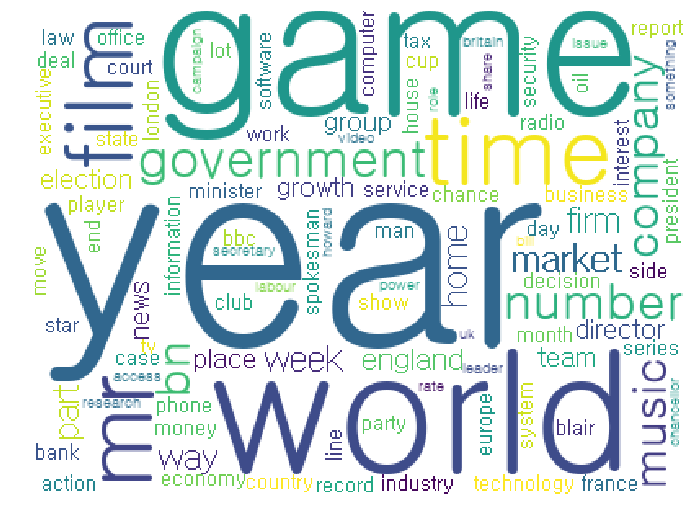

In [27]:
# 한번 시각화를 해보자.
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.style.use('ggplot')

wc = WordCloud(font_path='C:\\Windows\\fonts\\NGULIM.ttf', background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))

plt.figure(figsize=(12, 9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [28]:
count_iter = iter(count)
word_dict = dict(zip(words, count_iter))
word_dict

{'access': 33.02954155767459,
 'action': 54.55621511796305,
 'bank': 53.682048355311984,
 'bbc': 54.448582901995835,
 'bill': 36.4885466534024,
 'blair': 60.0462988555743,
 'bn': 86.76626883992229,
 'britain': 35.77560476197525,
 'business': 52.5162701718929,
 'campaign': 40.69450076010614,
 'case': 45.10282166327555,
 'chance': 49.963449706601025,
 'chancellor': 30.009316972888374,
 'club': 59.367138091549826,
 'company': 88.9422704879293,
 'computer': 43.038711403059374,
 'country': 53.65009341845042,
 'court': 54.10414360848424,
 'cup': 60.654925743170885,
 'day': 58.053346709080856,
 'deal': 57.841718271411374,
 'decision': 56.582432207115104,
 'director': 65.37687602997464,
 'economy': 58.01675423290709,
 'election': 64.40312063253167,
 'end': 60.36874288249458,
 'england': 72.63546154171016,
 'europe': 45.16708977871271,
 'executive': 49.666250422041756,
 'film': 118.26126244504222,
 'firm': 79.60113479624532,
 'france': 50.16666150313384,
 'game': 128.96157026148535,
 'governmen

In [29]:
import operator
sorted_tfidf = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_tfidf

[('year', 167.45743992945884),
 ('game', 128.96157026148535),
 ('world', 125.02466524796928),
 ('time', 124.27460682339115),
 ('mr', 123.99341073794784),
 ('film', 118.26126244504222),
 ('government', 103.73693856850876),
 ('number', 100.01055248856363),
 ('company', 88.9422704879293),
 ('music', 88.17971823607577),
 ('bn', 86.76626883992229),
 ('market', 85.56520558528501),
 ('way', 81.80832044553459),
 ('firm', 79.60113479624532),
 ('home', 78.44783200162442),
 ('week', 74.8070703836263),
 ('part', 74.4625706773605),
 ('england', 72.63546154171016),
 ('team', 68.0719783762391),
 ('group', 67.75730001598738),
 ('growth', 66.79526496882471),
 ('news', 65.89989445954109),
 ('director', 65.37687602997464),
 ('election', 64.40312063253167),
 ('place', 64.2199812269862),
 ('technology', 63.88118654559499),
 ('money', 63.74705810808864),
 ('tv', 62.16756168830471),
 ('minister', 61.48377572870282),
 ('record', 61.116715719064885),
 ('cup', 60.654925743170885),
 ('party', 60.417712250448595)

In [33]:
import pandas as pd
tfidf_df = pd.DataFrame(list(sorted_tfidf), columns=('word', 'TFIDF_Score'))
tfidf_df


,word,TFIDF_Score
0,year,167.457440
1,game,128.961570
2,world,125.024665
3,time,124.274607
4,mr,123.993411
...,...,...
95,power,35.530694
96,howard,35.355751
97,rate,35.268031
98,access,33.029542


In [34]:
# 파일로 저장해 나중에 쓰자.
tfidf_df.to_csv('UseData/sorted_tfidf.csv')

**간단한 실습**

In [43]:
import codecs
from konlpy.tag import Twitter
twitter = Twitter()
line = '오늘은 날씨가 우중충하다. 하지만 내일은 맑을지도 모르지요. 날씨가 맑을 것 이라면 외출해서 오락실에 가는 것도 좋지 않을까요?'

In [44]:
malist = twitter.pos(line)
malist

[('오늘', 'Noun'),
 ('은', 'Josa'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('우중충하다', 'Adjective'),
 ('.', 'Punctuation'),
 ('하지만', 'Conjunction'),
 ('내일', 'Noun'),
 ('은', 'Josa'),
 ('맑을지도', 'Adjective'),
 ('모르지요', 'Verb'),
 ('.', 'Punctuation'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('맑을', 'Adjective'),
 ('것', 'Noun'),
 ('이', 'Determiner'),
 ('라면', 'Noun'),
 ('외출', 'Noun'),
 ('해서', 'Verb'),
 ('오락실', 'Noun'),
 ('에', 'Josa'),
 ('가는', 'Verb'),
 ('것', 'Noun'),
 ('도', 'Josa'),
 ('좋지', 'Adjective'),
 ('않을까요', 'Verb'),
 ('?', 'Punctuation')]

In [45]:
# 2글자 이상의 명사만을 골라보자.
wordList = []
for word in malist:
    if word[1] in ['Noun']:
        if len(word[0]) < 2:
            continue
        else:
            wordList.append(word[0])
            
wordList

['오늘', '날씨', '내일', '날씨', '라면', '외출', '오락실']

    라면 이 이렇게 걸리네

In [46]:
# 특수문자만 제외시켜보자.
wordList2 = []
for word in malist:
    if word[1] not in ['Punctuation']:
        wordList2.append(word[0])
wordList2

['오늘',
 '은',
 '날씨',
 '가',
 '우중충하다',
 '하지만',
 '내일',
 '은',
 '맑을지도',
 '모르지요',
 '날씨',
 '가',
 '맑을',
 '것',
 '이',
 '라면',
 '외출',
 '해서',
 '오락실',
 '에',
 '가는',
 '것',
 '도',
 '좋지',
 '않을까요']